<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/Proyecto_SRI_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 4

*   Mauricio V.
*   Henry S.
*   Fernando T.
*   Elena Jones


The project aims to replicate a real-world exercise as data scientists with a business focus, through a case study that provides a solution to a problem identified in a company, at the discretion of each participating group. The case must be presented in the form of a proposal and should convince a jury while defending its arguments against competing teams.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.affinity import translate
import geopandas as gpd
import plotly.express as px
import matplotlib.colors as mcolors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
source_path = '/content/drive/My Drive/Proyecto-SRI/data/'

# Loading the files

In [ ]:
df_2023 = pd.read_csv(source_path + "sri_ventas_2023.csv",encoding='latin-1', sep='|')
print(df_2023.shape)
df_2023.head()

(47860, 14)


,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,2023,10,G,EL ORO,PIÑAS,"2675765,3000","3524809,9600","1301962,3300","2697231,6000","4784173,1500","184522,5100","43042,8100","7708970,0700","7502537,5900"
1,2023,8,P,LOS RIOS,BABAHOYO,"55829,5000","376105,3100","0,0000","256505,9400","133052,4900","0,0000","22593,0200","412151,4500","431934,8100"
2,2023,3,G,COTOPAXI,LATACUNGA,"24442135,1100","12449002,0200","2082675,2600","22947584,9200","11888453,5500","2340134,3500","250031,2200","37426204,0400","38973812,3900"
3,2023,3,A,PICHINCHA,QUITO,"21483622,4500","127262619,1700","40676602,8800","32964155,2500","64496994,0200","19697185,7600","946366,0900","118595471,5000","189422844,5000"
4,2023,6,I,ZAMORA CHINCHIPE,PALANDA,"9926,2900","0,0000","0,0000","14956,3100","3833,5500","0,0000","0,0000","18789,8600","9926,2900"


In [ ]:
df_2024 = pd.read_csv(source_path + "sri_ventas_2024.csv",encoding='latin-1', sep='|')
print(df_2024.shape)
df_2024.head()

(12219, 14)


,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,2024,1,H,MORONA SANTIAGO,GUALAQUIZA,"446258,9200","222603,9700","0,0000","419545,2700","146051,6000","0,0000","6344,9600","571941,8300","668862,8900"
1,2024,1,G,ZAMORA CHINCHIPE,YACUAMBI,"4366,0800","8558,8100","0,0000","19556,2500","22490,5200","1851,3000","0,0000","43898,0700","12924,8900"
2,2024,1,V,GUAYAS,EL EMPALME,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
3,2024,1,F,EL ORO,MACHALA,"6975345,5700","2875230,2800","0,0000","6857834,8700","481562,1700","425289,2500","139599,0900","7940352,7400","9850575,8500"
4,2024,1,M,ESMERALDAS,ATACAMES,"70882,9900","127216,9700","0,0000","51183,3300","15383,9000","274,6200","445,4500","67287,3000","198099,9600"


In [ ]:
df = pd.concat([df_2023, df_2024], ignore_index=True)
df.head()

,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,2023,10,G,EL ORO,PIÑAS,"2675765,3000","3524809,9600","1301962,3300","2697231,6000","4784173,1500","184522,5100","43042,8100","7708970,0700","7502537,5900"
1,2023,8,P,LOS RIOS,BABAHOYO,"55829,5000","376105,3100","0,0000","256505,9400","133052,4900","0,0000","22593,0200","412151,4500","431934,8100"
2,2023,3,G,COTOPAXI,LATACUNGA,"24442135,1100","12449002,0200","2082675,2600","22947584,9200","11888453,5500","2340134,3500","250031,2200","37426204,0400","38973812,3900"
3,2023,3,A,PICHINCHA,QUITO,"21483622,4500","127262619,1700","40676602,8800","32964155,2500","64496994,0200","19697185,7600","946366,0900","118595471,5000","189422844,5000"
4,2023,6,I,ZAMORA CHINCHIPE,PALANDA,"9926,2900","0,0000","0,0000","14956,3100","3833,5500","0,0000","0,0000","18789,8600","9926,2900"


In [ ]:
df_acteco = pd.read_excel(source_path + "ciiu4-cpc2.xlsx")
df_acteco.columns=['codigo', 'cpc2', 'categoria']
df_acteco.head()

,codigo,cpc2,categoria
0,A,,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA."
1,A01,,"AGRICULTURA, GANADERÍA, CAZA Y ACTIVIDADES DE ..."
2,A011,,CULTIVO DE PLANTAS NO PERENNES.
3,A0111,,"CULTIVO DE CEREALES (EXCEPTO ARROZ), LEGUMBRES..."
4,A0111.1,,CULTIVO DE CEREALES.


In [ ]:
df_regiones= pd.read_csv(source_path + "regiones-ecuador.csv")
df_regiones.head()

,region,provincia
0,COSTA,ESMERALDAS
1,COSTA,MANABI
2,COSTA,GUAYAS
3,COSTA,SANTO DOMINGO DE LOS TSACHILAS
4,COSTA,LOS RIOS


# Preparing

In [ ]:
df_merged = pd.merge(df, df_acteco[['codigo','categoria']], left_on='CODIGO_SECTOR_N1', right_on='codigo', how='inner')
df_merged.head(2)

,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS,codigo,categoria
0,2023,10,G,EL ORO,PIÑAS,"2675765,3000","3524809,9600","1301962,3300","2697231,6000","4784173,1500","184522,5100","43042,8100","7708970,0700","7502537,5900",G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...
1,2023,3,G,COTOPAXI,LATACUNGA,"24442135,1100","12449002,0200","2082675,2600","22947584,9200","11888453,5500","2340134,3500","250031,2200","37426204,0400","38973812,3900",G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...


In [ ]:
df_ec = pd.merge(df_merged, df_regiones, left_on='PROVINCIA', right_on='provincia', how='inner')
df_ec.head(3)

,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS,codigo,categoria,region,provincia
0,2023,10,G,EL ORO,PIÑAS,"2675765,3000","3524809,9600","1301962,3300","2697231,6000","4784173,1500","184522,5100","43042,8100","7708970,0700","7502537,5900",G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO
1,2023,1,G,EL ORO,EL GUABO,"3444291,1200","5565896,8100","3594595,8600","3566795,5300","8485367,3600","143377,2500","61163,4400","12256703,5800","12604783,7900",G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO
2,2023,1,G,EL ORO,PASAJE,"4451155,3200","5210842,5700","2936371,0800","4935526,3300","7369853,3600","213646,0000","141465,4600","12660491,1500","12598368,9700",G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO


In [ ]:
df_ec.columns

Index(['AÑO', 'MES', 'CODIGO_SECTOR_N1', 'PROVINCIA', 'CANTON',
       'VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES',
       'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES',
       'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS', 'codigo', 'categoria',
       'region', 'provincia'],
      dtype='object')

In [ ]:
def format_amount(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    return df

columns_f = ['VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES',
       'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES',
       'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS']
df_ec = format_amount(df_ec, columns_f)

In [ ]:
df_ec.head(3)

,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS,codigo,categoria,region,provincia
0,2023,10,G,EL ORO,PIÑAS,2675765.30,3524809.96,1301962.33,2697231.60,4784173.15,184522.51,43042.81,7708970.07,7502537.59,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO
1,2023,1,G,EL ORO,EL GUABO,3444291.12,5565896.81,3594595.86,3566795.53,8485367.36,143377.25,61163.44,12256703.58,12604783.79,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO
2,2023,1,G,EL ORO,PASAJE,4451155.32,5210842.57,2936371.08,4935526.33,7369853.36,213646.00,141465.46,12660491.15,12598368.97,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COSTA,EL ORO


In [ ]:
df_ec['COMPRAS_NETAS_TARIFA_0_ESCALA'] = df_ec['COMPRAS_NETAS_TARIFA_0']/1000
df_ec['VENTAS_NETAS_TARIFA_0_ESCALA'] = df_ec['VENTAS_NETAS_TARIFA_0']/1000
df_ec['EXPORTACIONES_ESCALA'] = df_ec['EXPORTACIONES']/1000
df_ec['IMPORTACIONES_ESCALA'] = df_ec['IMPORTACIONES']/1000
df_ec['TOTAL_COMPRAS_ESCALA'] = df_ec['TOTAL_COMPRAS']/1000
df_ec['TOTAL_VENTAS_ESCALA'] = df_ec['TOTAL_VENTAS']/1000
df_ec['COMPRAS_RISE_ESCALA'] = df_ec['COMPRAS_RISE']/1000
df_ec['VENTAS_NETAS_TARIFA_12_ESCALA'] = df_ec['VENTAS_NETAS_TARIFA_12']/1000
df_ec['COMPRAS_NETAS_TARIFA_12_ESCALA'] = df_ec['COMPRAS_NETAS_TARIFA_12']/1000
df_ec.head(3)

,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,...,provincia,COMPRAS_NETAS_TARIFA_0_ESCALA,VENTAS_NETAS_TARIFA_0_ESCALA,EXPORTACIONES_ESCALA,IMPORTACIONES_ESCALA,TOTAL_COMPRAS_ESCALA,TOTAL_VENTAS_ESCALA,COMPRAS_RISE_ESCALA,VENTAS_NETAS_TARIFA_12_ESCALA,COMPRAS_NETAS_TARIFA_12_ESCALA
0,2023,10,G,EL ORO,PIÑAS,2675765.30,3524809.96,1301962.33,2697231.60,4784173.15,...,EL ORO,4784.17315,3524.80996,1301.96233,184.52251,7708.97007,7502.53759,43.04281,2675.76530,2697.23160
1,2023,1,G,EL ORO,EL GUABO,3444291.12,5565896.81,3594595.86,3566795.53,8485367.36,...,EL ORO,8485.36736,5565.89681,3594.59586,143.37725,12256.70358,12604.78379,61.16344,3444.29112,3566.79553
2,2023,1,G,EL ORO,PASAJE,4451155.32,5210842.57,2936371.08,4935526.33,7369853.36,...,EL ORO,7369.85336,5210.84257,2936.37108,213.64600,12660.49115,12598.36897,141.46546,4451.15532,4935.52633


In [ ]:
df_ec['categoria'] = df_ec['categoria'].str.replace('ACTIVIDADES', 'ACT.')

In [ ]:
df_ec.loc[df_ec['categoria'].isna(), 'categoria'] = 'NO DEFINIDO'
df_ec['categoria'].unique()

array(['COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS.',
       'ENSEÑANZA.', 'AGRICULTURA, GANADERÍA,  SILVICULTURA Y PESCA.',
       'ACT. DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.',
       'OTRAS ACT. DE SERVICIOS.',
       'ACT. PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.',
       'TRANSPORTE Y ALMACENAMIENTO.', 'EXPLOTACIÓN DE MINAS Y CANTERAS.',
       'CONSTRUCCIÓN.', 'ACT. DE SERVICIOS ADMINISTRATIVOS Y DE APOYO.',
       'INFORMACIÓN Y COMUNICACIÓN.', 'INDUSTRIAS MANUFACTURERAS.',
       'ACT. INMOBILIARIAS.',
       'ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL.',
       'ARTES, ENTRETENIMIENTO Y RECREACIÓN.',
       'ACT. FINANCIERAS Y DE SEGUROS.',
       'ACT. DE LOS HOGARES COMO EMPLEADORES; ACT. NO DIFERENCIADAS DE LOS HOGARES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO.',
       'ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA.',
       'SUMINISTRO DE ELECTRICIDAD, GAS, 

GEOPOSICION

In [ ]:
geo_position = gpd.read_file(source_path + 'ecuador.geojson')
geo_position = geo_position[["geometry", "dpa_despro", "dpa_provin"]]
geo_position = geo_position.rename(columns={"dpa_despro": "PROVINCIA"})
geo_position.head()

,geometry,PROVINCIA,dpa_provin
0,"POLYGON ((-78.56954 -2.55865, -78.55638 -2.560...",AZUAY,01
1,"POLYGON ((-78.86209 -1.19140, -78.93792 -1.360...",BOLIVAR,02
2,"POLYGON ((-78.56954 -2.55865, -78.61701 -2.628...",CAÑAR,03
3,"POLYGON ((-77.53187 0.65236, -77.65643 0.64755...",CARCHI,04
4,"POLYGON ((-78.42185 -0.71691, -78.39141 -0.748...",COTOPAXI,05


# Graphs

VENTAS

In [ ]:
top_provincias = df_ec.groupby('PROVINCIA')['TOTAL_VENTAS_ESCALA'].mean().sort_values(ascending=False).reset_index().head(10)
top_provincias

,PROVINCIA,TOTAL_VENTAS_ESCALA
0,PICHINCHA,48629.635943
1,GUAYAS,15230.132328
2,SANTO DOMINGO DE LOS TSACHILAS,7727.616597
3,AZUAY,3466.631113
4,TUNGURAHUA,2689.600107
5,EL ORO,2533.313926
6,MANABI,2048.105233
7,SANTA ELENA,1925.107149
8,ESMERALDAS,1640.172410
9,IMBABURA,1619.922586


In [ ]:
import seaborn as sns

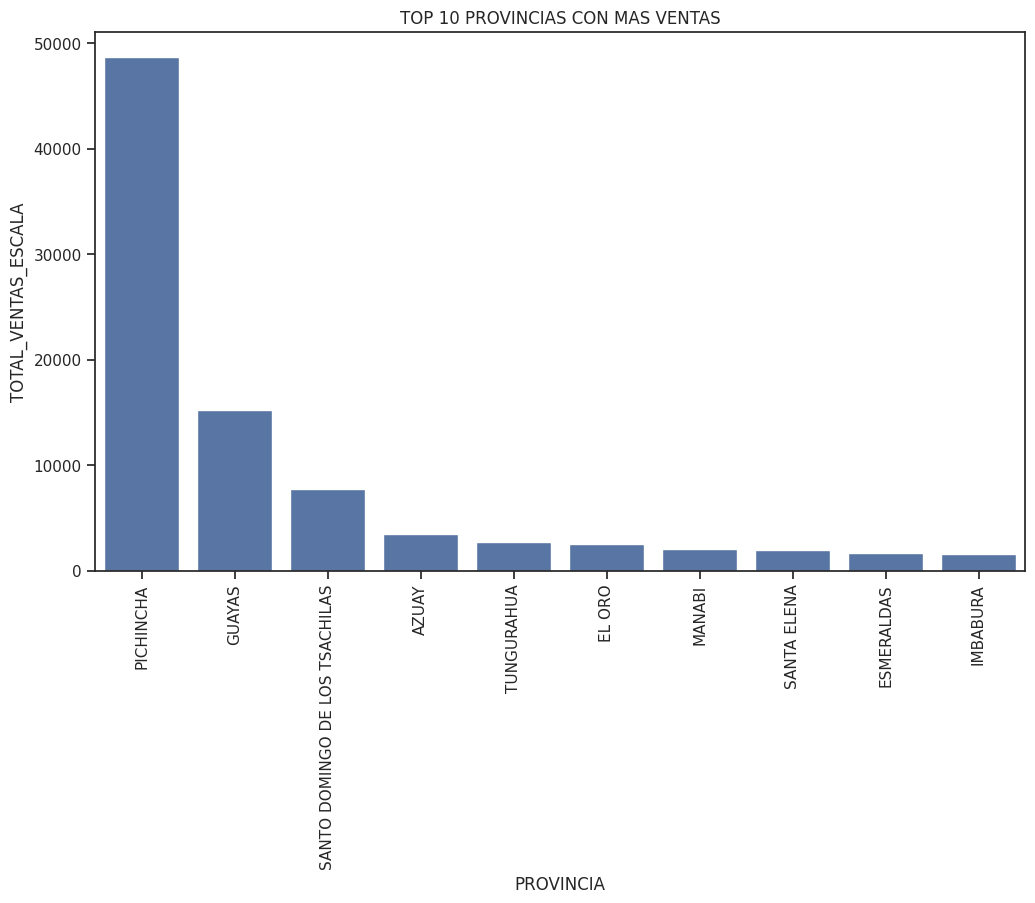

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme(style='ticks')#'darkgrid')
sns.barplot(x=top_provincias.PROVINCIA, y=top_provincias.TOTAL_VENTAS_ESCALA)
plt.title('TOP 10 PROVINCIAS CON MAS VENTAS')
plt.xticks(rotation=90)
plt.show()

COMPRAS

In [ ]:
top_compras = df_ec.groupby(['PROVINCIA'])['TOTAL_COMPRAS_ESCALA'].mean().sort_values(ascending=False).reset_index().head(10)
top_compras.head(2)

,PROVINCIA,TOTAL_COMPRAS_ESCALA
0,PICHINCHA,35640.511658
1,GUAYAS,12481.860404


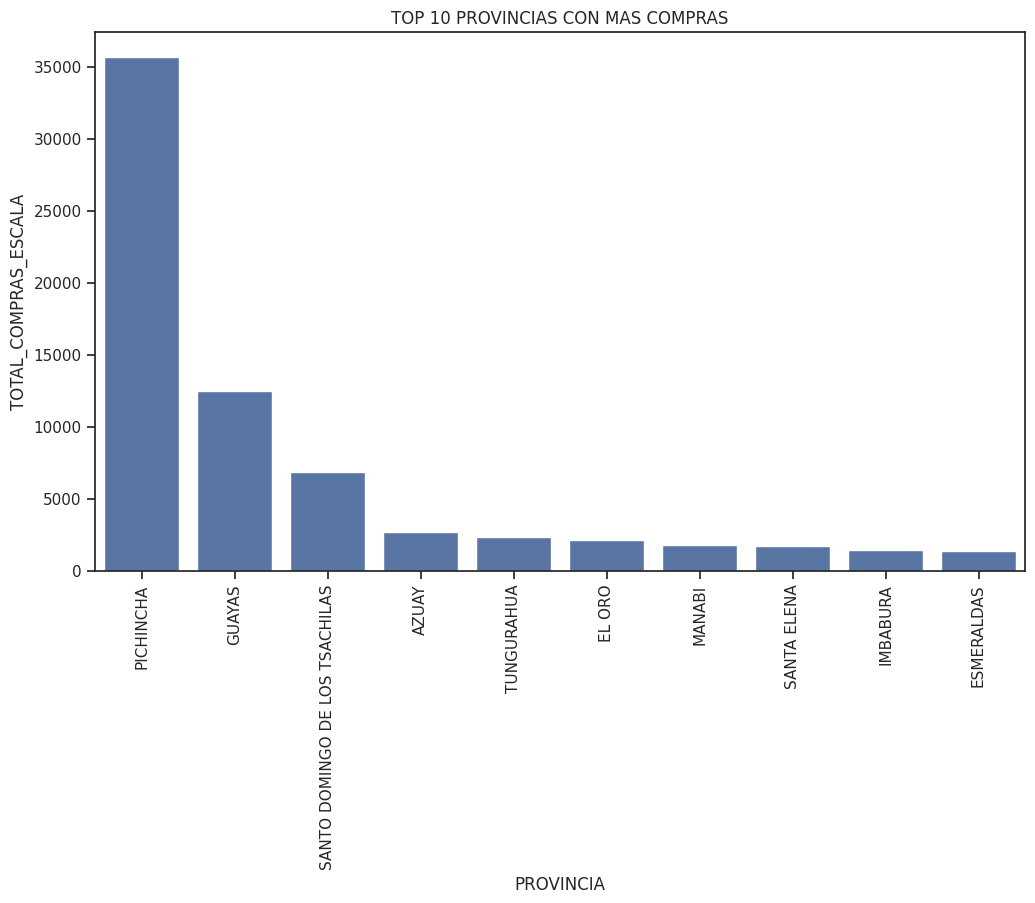

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme(style='ticks')#'darkgrid')
sns.barplot(x=top_compras.PROVINCIA, y=top_compras.TOTAL_COMPRAS_ESCALA)
plt.title('TOP 10 PROVINCIAS CON MAS COMPRAS')
plt.xticks(rotation=90)
plt.show()

EXPORTACIONES VS IMPORTACIONES

In [ ]:
df_imp_exp = df_ec.groupby('PROVINCIA')[['EXPORTACIONES_ESCALA','IMPORTACIONES_ESCALA']].mean().reset_index()
df_imp_exp.head(3)

,PROVINCIA,EXPORTACIONES_ESCALA,IMPORTACIONES_ESCALA
0,AZUAY,72.103608,473.779111
1,BOLIVAR,3.329018,1.767235
2,CARCHI,31.985870,14.344948


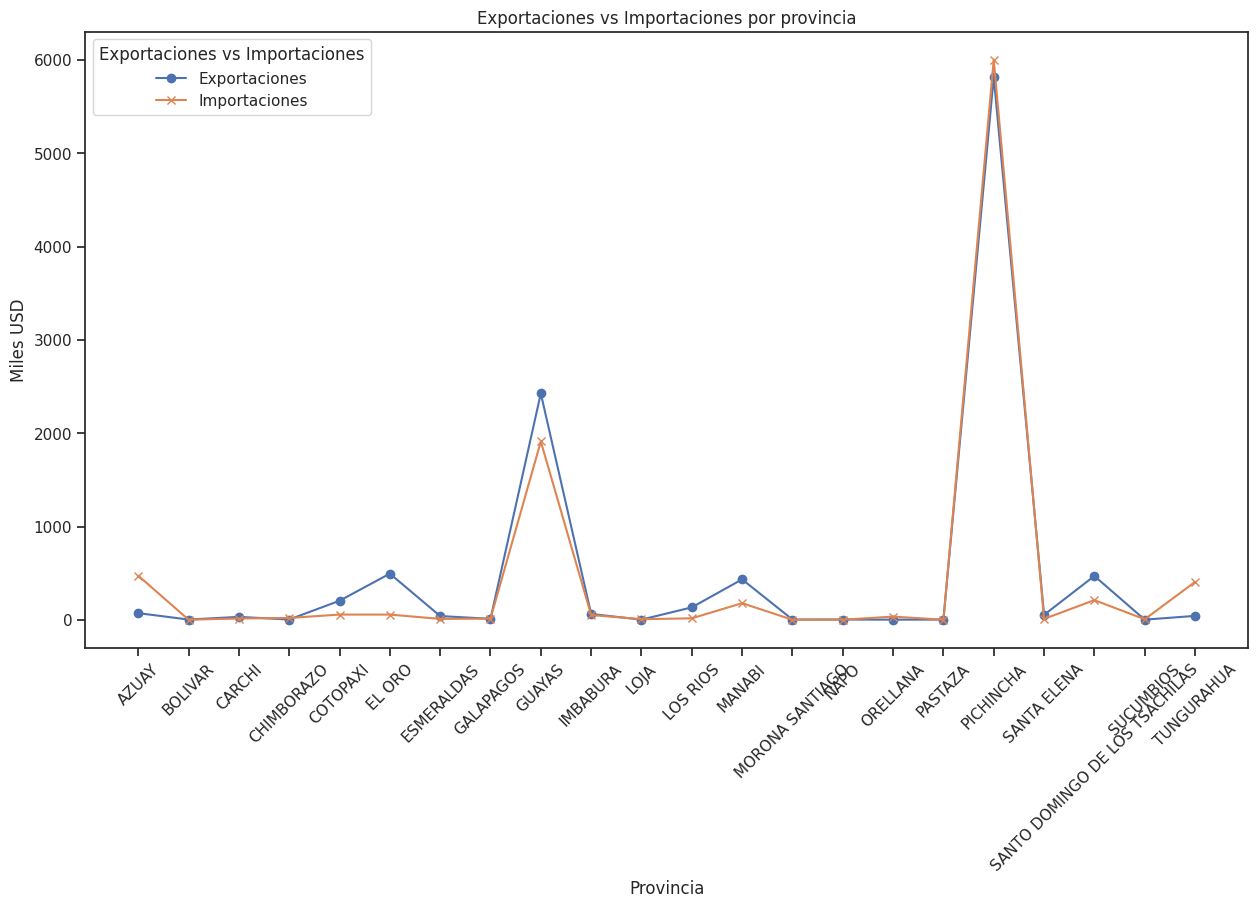

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_imp_exp.PROVINCIA, df_imp_exp.EXPORTACIONES_ESCALA,marker="o",label="Exportaciones")
ax.plot(df_imp_exp.PROVINCIA, df_imp_exp.IMPORTACIONES_ESCALA,marker="x", label="Importaciones")

plt.ylabel("Miles USD")
plt.xlabel("Provincia")

plt.title("Exportaciones vs Importaciones por provincia")
plt.legend(title="Exportaciones vs Importaciones")
plt.xticks(rotation=45)
plt.show()

MAPAS

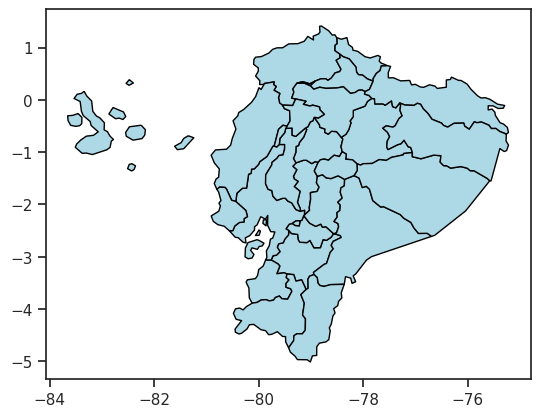

In [ ]:
x_offset = 8
y_offset = 0
galapagos = geo_position[geo_position['PROVINCIA'] == 'GALAPAGOS'].copy()
galapagos['geometry'] = galapagos['geometry'].apply(lambda geom: translate(geom, xoff=x_offset, yoff=y_offset))
rest_of_ecuador = geo_position[geo_position['PROVINCIA'] != 'GALAPAGOS']
geo_position_moved = pd.concat([rest_of_ecuador, galapagos])
geo_position_moved.plot(color='lightblue', edgecolor='black')
plt.show()

In [ ]:
geo_position.shape

(25, 3)

In [ ]:
ventas_provincia = df_ec.groupby('PROVINCIA').agg({'TOTAL_VENTAS': 'sum'}).reset_index()
ventas_provincia_r = geo_position_moved.merge(ventas_provincia, on='PROVINCIA', how='left')
ventas_provincia_r['TOTAL_VENTAS_MILLONES'] = (ventas_provincia_r['TOTAL_VENTAS'] / 1000000).round(0)
ventas_provincia_r.head()

,geometry,PROVINCIA,dpa_provin,TOTAL_VENTAS,TOTAL_VENTAS_MILLONES
0,"POLYGON ((-78.56954 -2.55865, -78.55638 -2.560...",AZUAY,01,1.309347e+10,13093.0
1,"POLYGON ((-78.86209 -1.19140, -78.93792 -1.360...",BOLIVAR,02,4.550051e+08,455.0
2,"POLYGON ((-78.56954 -2.55865, -78.61701 -2.628...",CAÑAR,03,NaN,NaN
3,"POLYGON ((-77.53187 0.65236, -77.65643 0.64755...",CARCHI,04,8.522688e+08,852.0
4,"POLYGON ((-78.42185 -0.71691, -78.39141 -0.748...",COTOPAXI,05,2.803659e+09,2804.0


In [ ]:
compras_provincia = df_ec.groupby('PROVINCIA').agg({'TOTAL_COMPRAS': 'sum'}).reset_index()
compras_provincia = geo_position_moved.merge(compras_provincia, on='PROVINCIA', how='left')
compras_provincia['TOTAL_COMPRAS_MILLONES'] = (compras_provincia['TOTAL_COMPRAS'] / 1000000).round(0)
compras_provincia.head()

,geometry,PROVINCIA,dpa_provin,TOTAL_COMPRAS,TOTAL_COMPRAS_MILLONES
0,"POLYGON ((-78.56954 -2.55865, -78.55638 -2.560...",AZUAY,01,1.025348e+10,10253.0
1,"POLYGON ((-78.86209 -1.19140, -78.93792 -1.360...",BOLIVAR,02,4.119264e+08,412.0
2,"POLYGON ((-78.56954 -2.55865, -78.61701 -2.628...",CAÑAR,03,NaN,NaN
3,"POLYGON ((-77.53187 0.65236, -77.65643 0.64755...",CARCHI,04,8.087141e+08,809.0
4,"POLYGON ((-78.42185 -0.71691, -78.39141 -0.748...",COTOPAXI,05,2.422877e+09,2423.0


In [ ]:
vmin = min(ventas_provincia_r['TOTAL_VENTAS_MILLONES'].min(), compras_provincia['TOTAL_COMPRAS_MILLONES'].min())
vmax = max(ventas_provincia_r['TOTAL_VENTAS_MILLONES'].max(), compras_provincia['TOTAL_COMPRAS_MILLONES'].max())
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = 'coolwarm'
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

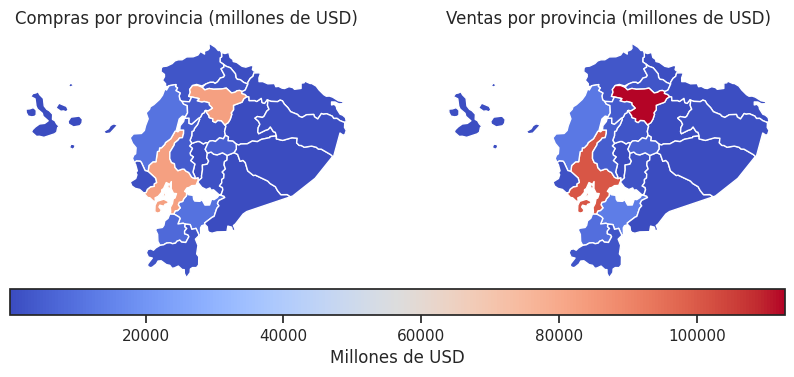

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ventas_provincia_r.plot(
    ax=ax[1], column="TOTAL_VENTAS_MILLONES", legend=False, cmap=cmap, norm=norm
)
ax[1].set_title("Ventas por provincia (millones de USD)")
compras_provincia.plot(
    ax=ax[0], column="TOTAL_COMPRAS_MILLONES", legend=False, cmap=cmap, norm=norm
)
ax[0].set_title("Compras por provincia (millones de USD)")
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [ ]:
# mapa de ventas por provincia
fig = px.choropleth(
    ventas_provincia_r,
    geojson=ventas_provincia_r.geometry,
    locations=ventas_provincia_r.index,
    color='TOTAL_VENTAS_MILLONES',
    hover_name='PROVINCIA',
    title='Ventas por provincia',
    labels={'TOTAL_VENTAS_MILLONES': 'Ventas en millones de dolares'}
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
ventas_provincia_12 = df_ec.groupby('PROVINCIA').agg({'VENTAS_NETAS_TARIFA_12': 'sum'}).reset_index()
ventas_provincia_12 = geo_position_moved.merge(ventas_provincia_12, on='PROVINCIA', how='left')
ventas_provincia_12['VENTAS_NETAS_TARIFA_12_MILLONES'] = (ventas_provincia_12['VENTAS_NETAS_TARIFA_12'] / 1000000).round(0)
ventas_provincia_0 = df_ec.groupby('PROVINCIA').agg({'VENTAS_NETAS_TARIFA_0': 'sum'}).reset_index()
ventas_provincia_0 = geo_position_moved.merge(ventas_provincia_0, on='PROVINCIA', how='left')
ventas_provincia_0['VENTAS_NETAS_TARIFA_0_MILLONES'] = (ventas_provincia_0['VENTAS_NETAS_TARIFA_0'] / 1000000).round(0)

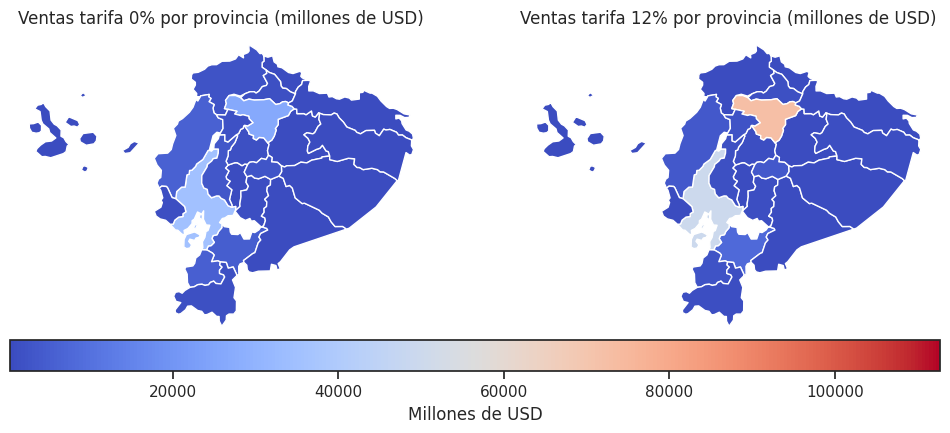

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ventas_provincia_12.plot(
    ax=ax[1], column="VENTAS_NETAS_TARIFA_12_MILLONES", legend=False, cmap=cmap, norm=norm
)
ventas_provincia_0.plot(
    ax=ax[0], column="VENTAS_NETAS_TARIFA_0_MILLONES", legend=False, cmap=cmap, norm=norm
)
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0].set_title("Ventas tarifa 0% por provincia (millones de USD)")
ax[0].axis('off')
ax[1].set_title("Ventas tarifa 12% por provincia (millones de USD)")
ax[1].axis('off')
plt.show()

In [ ]:
compras_provincia_12 = df_ec.groupby('PROVINCIA').agg({'COMPRAS_NETAS_TARIFA_12': 'sum'}).reset_index()
compras_provincia_12 = geo_position_moved.merge(compras_provincia_12, on='PROVINCIA', how='left')
compras_provincia_12['COMPRAS_NETAS_TARIFA_12_MILLONES'] = (compras_provincia_12['COMPRAS_NETAS_TARIFA_12'] / 1000000).round(0)
compras_provincia_0 = df_ec.groupby('PROVINCIA').agg({'COMPRAS_NETAS_TARIFA_0': 'sum'}).reset_index()
compras_provincia_0 = geo_position_moved.merge(compras_provincia_0, on='PROVINCIA', how='left')
compras_provincia_0['COMPRAS_NETAS_TARIFA_0_MILLONES'] = (compras_provincia_0['COMPRAS_NETAS_TARIFA_0'] / 1000000).round(0)

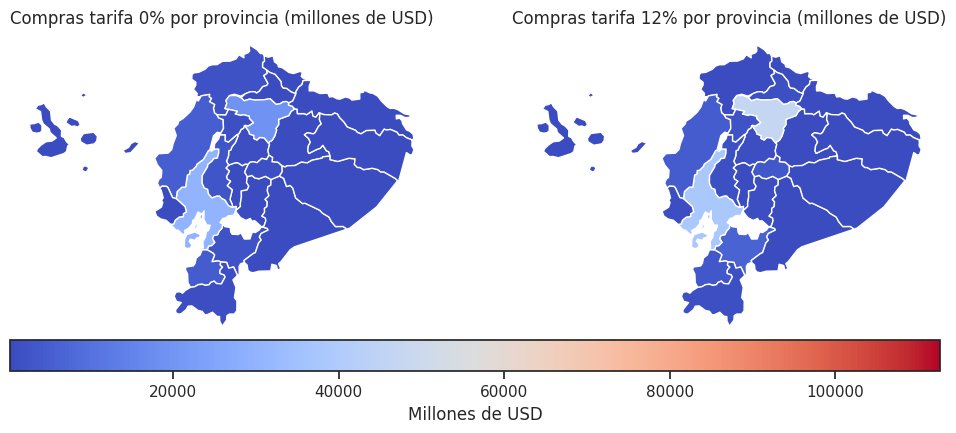

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
compras_provincia_12.plot(
    ax=ax[1], column="COMPRAS_NETAS_TARIFA_12_MILLONES", legend=False, cmap=cmap, norm=norm
)
compras_provincia_0.plot(
    ax=ax[0], column="COMPRAS_NETAS_TARIFA_0_MILLONES", legend=False, cmap=cmap, norm=norm
)
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0].set_title("Compras tarifa 0% por provincia (millones de USD)")
ax[0].axis('off')
ax[1].set_title("Compras tarifa 12% por provincia (millones de USD)")
ax[1].axis('off')
plt.show()

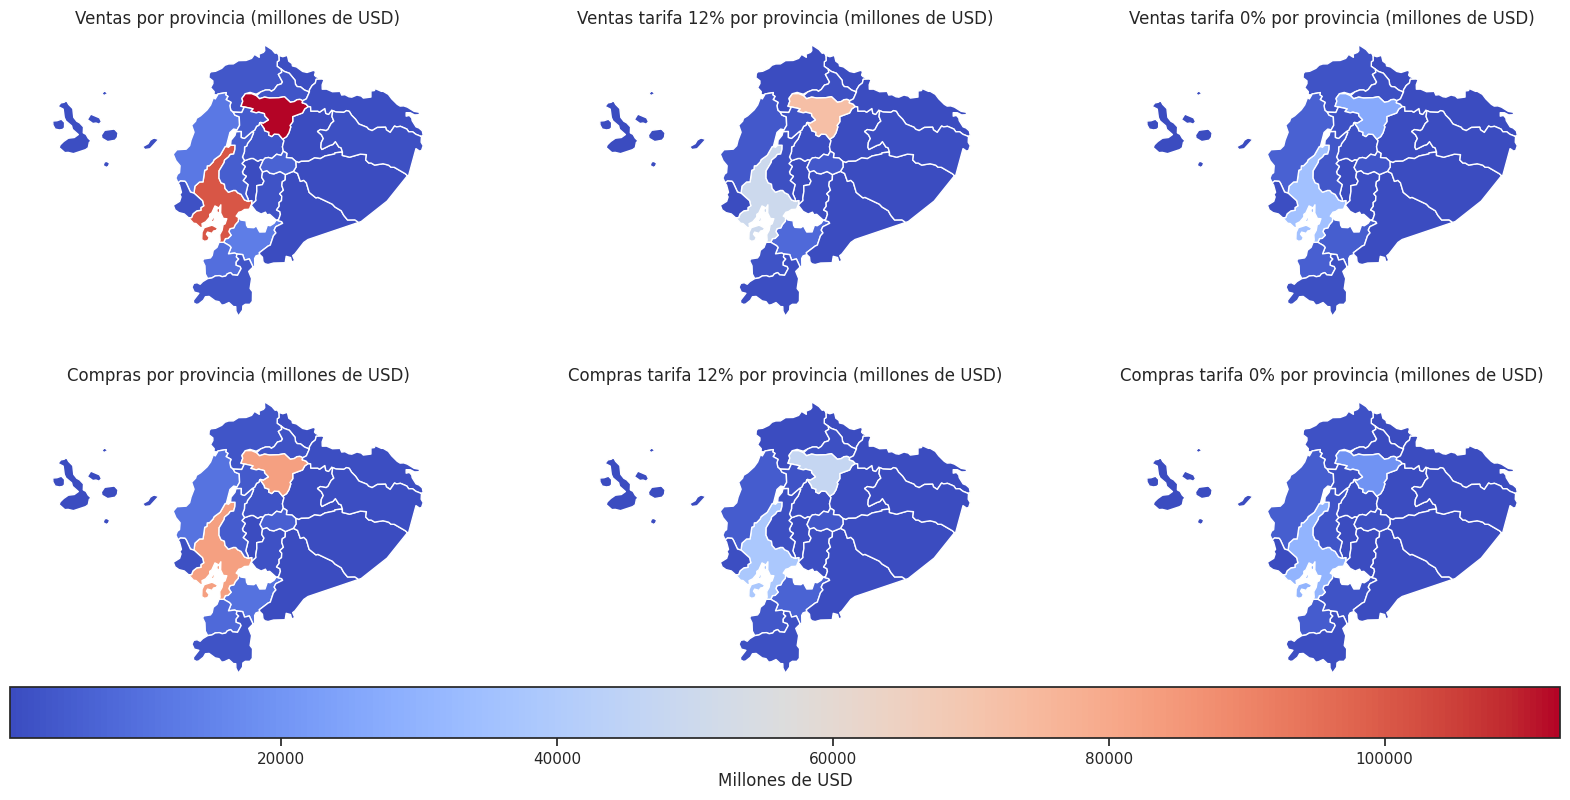

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ventas_provincia_r.plot(
    ax=ax[0, 0], column="TOTAL_VENTAS_MILLONES", legend=False, cmap=cmap, norm=norm
)
ventas_provincia_12.plot(
    ax=ax[0, 1], column="VENTAS_NETAS_TARIFA_12_MILLONES", legend=False, cmap=cmap, norm=norm
)
ventas_provincia_0.plot(
    ax=ax[0, 2], column="VENTAS_NETAS_TARIFA_0_MILLONES", legend=False, cmap=cmap, norm=norm
)
compras_provincia.plot(
    ax=ax[1, 0], column="TOTAL_COMPRAS_MILLONES", legend=False, cmap=cmap, norm=norm
)
compras_provincia_12.plot(
    ax=ax[1, 1], column="COMPRAS_NETAS_TARIFA_12_MILLONES", legend=False, cmap=cmap, norm=norm
)
compras_provincia_0.plot(
    ax=ax[1, 2], column="COMPRAS_NETAS_TARIFA_0_MILLONES", legend=False, cmap=cmap, norm=norm
)
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0, 0].set_title("Ventas por provincia (millones de USD)")
ax[0, 0].axis('off')
ax[0, 1].set_title("Ventas tarifa 12% por provincia (millones de USD)")
ax[0, 1].axis('off')
ax[0, 2].set_title("Ventas tarifa 0% por provincia (millones de USD)")
ax[0, 2].axis('off')
ax[1, 0].set_title("Compras por provincia (millones de USD)")
ax[1, 0].axis('off')
ax[1, 1].set_title("Compras tarifa 12% por provincia (millones de USD)")
ax[1, 1].axis('off')
ax[1, 2].set_title("Compras tarifa 0% por provincia (millones de USD)")
ax[1, 2].axis('off')
plt.show()

In [ ]:
def apply_impuesto(row):
    if row['AÑO'] == 2024 and row['MES'] >= 4:
        return 0.15
    return 0.12

df_ec['IVA'] = df_ec.apply(apply_impuesto, axis=1)

In [ ]:
df_ec['VENTAS_12_BRUTAS'] = df_ec['VENTAS_NETAS_TARIFA_12'] / (1 + df_ec['IVA'])
df_ec['COMPRAS_12_BRUTAS'] = df_ec['COMPRAS_NETAS_TARIFA_12'] / (1 + df_ec['IVA'])

In [ ]:
df_ec['IMPUESTO_VENTAS_12_MILLONES'] = ((df_ec['VENTAS_12_BRUTAS'] * df_ec['IVA']) / 1000000).round(0)
df_ec['IMPUESTO_COMPRAS_12_MILLONES'] = ((df_ec['COMPRAS_12_BRUTAS'] * df_ec['IVA']) / 1000000).round(0)

In [ ]:
impuesto_ventas_12_mill = df_ec.groupby('PROVINCIA').agg({'IMPUESTO_VENTAS_12_MILLONES': 'sum'}).reset_index()
impuesto_ventas_12_mill = geo_position_moved.merge(impuesto_ventas_12_mill, on='PROVINCIA', how='left')
impuesto_compras_12_mill = df_ec.groupby('PROVINCIA').agg({'IMPUESTO_COMPRAS_12_MILLONES': 'sum'}).reset_index()
impuesto_compras_12_mill = geo_position_moved.merge(impuesto_compras_12_mill, on='PROVINCIA', how='left')
impuesto_compras_12_mill.head()

,geometry,PROVINCIA,dpa_provin,IMPUESTO_COMPRAS_12_MILLONES
0,"POLYGON ((-78.56954 -2.55865, -78.55638 -2.560...",AZUAY,01,581.0
1,"POLYGON ((-78.86209 -1.19140, -78.93792 -1.360...",BOLIVAR,02,5.0
2,"POLYGON ((-78.56954 -2.55865, -78.61701 -2.628...",CAÑAR,03,NaN
3,"POLYGON ((-77.53187 0.65236, -77.65643 0.64755...",CARCHI,04,17.0
4,"POLYGON ((-78.42185 -0.71691, -78.39141 -0.748...",COTOPAXI,05,71.0


In [ ]:
# ignorar guayas y pichincha
impuesto_ventas_12_mill = impuesto_ventas_12_mill[~impuesto_ventas_12_mill['PROVINCIA'].isin(['GUAYAS', 'PICHINCHA'])]
impuesto_compras_12_mill = impuesto_compras_12_mill[~impuesto_compras_12_mill['PROVINCIA'].isin(['GUAYAS', 'PICHINCHA'])]

In [ ]:
vmin_2 = min(
    [
        impuesto_ventas_12_mill["IMPUESTO_VENTAS_12_MILLONES"].min(),
        impuesto_compras_12_mill["IMPUESTO_COMPRAS_12_MILLONES"].min(),
    ]
)
vmax_2 = max(
    [
        impuesto_ventas_12_mill["IMPUESTO_VENTAS_12_MILLONES"].max(),
        impuesto_compras_12_mill["IMPUESTO_COMPRAS_12_MILLONES"].max(),
    ]
)
norm_2 = mcolors.Normalize(vmin=vmin_2, vmax=vmax_2)
cmap = "coolwarm"
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_2)
sm.set_array([])

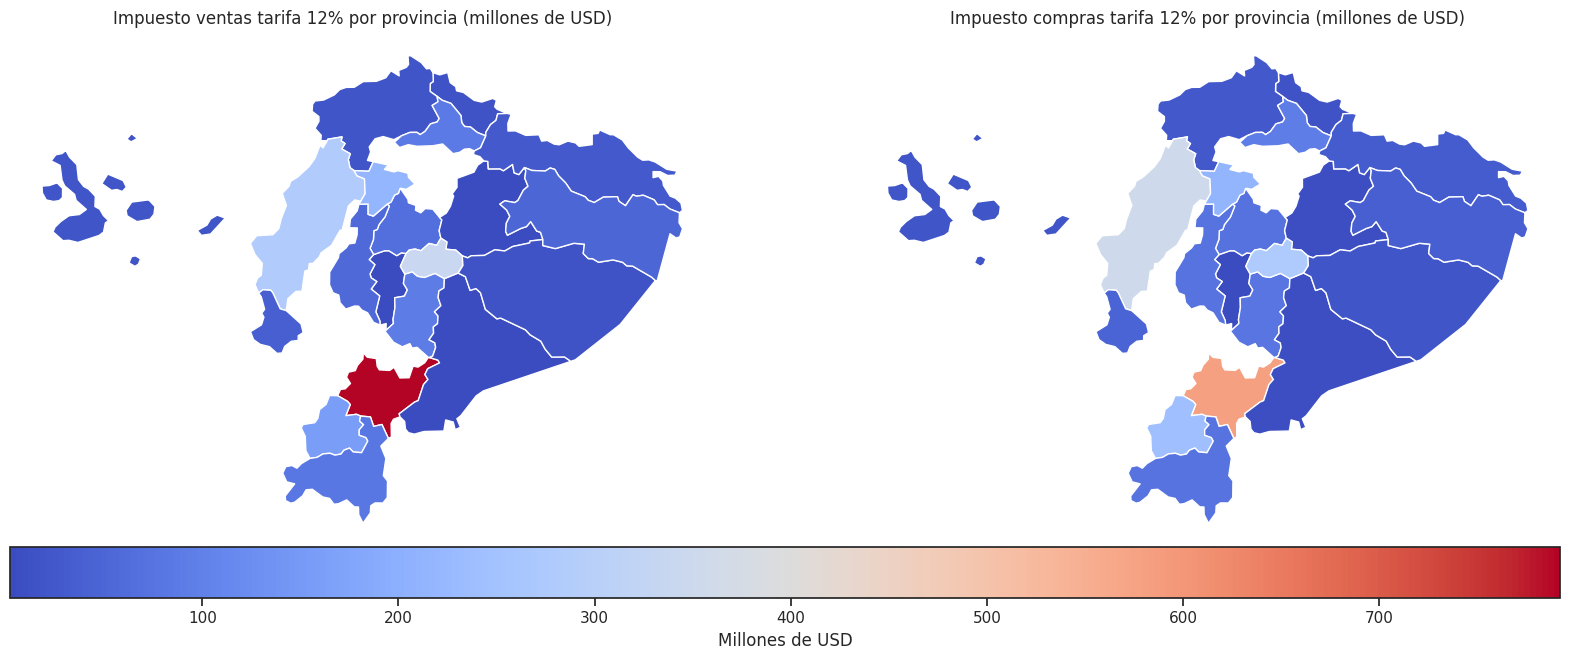

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
impuesto_ventas_12_mill.plot(
    ax=ax[0], column="IMPUESTO_VENTAS_12_MILLONES", legend=False, cmap=cmap, norm=norm_2
)
impuesto_compras_12_mill.plot(
    ax=ax[1], column="IMPUESTO_COMPRAS_12_MILLONES", legend=False, cmap=cmap, norm=norm_2
)
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0].set_title("Impuesto ventas tarifa 12% por provincia (millones de USD)")
ax[0].axis('off')
ax[1].set_title("Impuesto compras tarifa 12% por provincia (millones de USD)")
ax[1].axis('off')
plt.show()

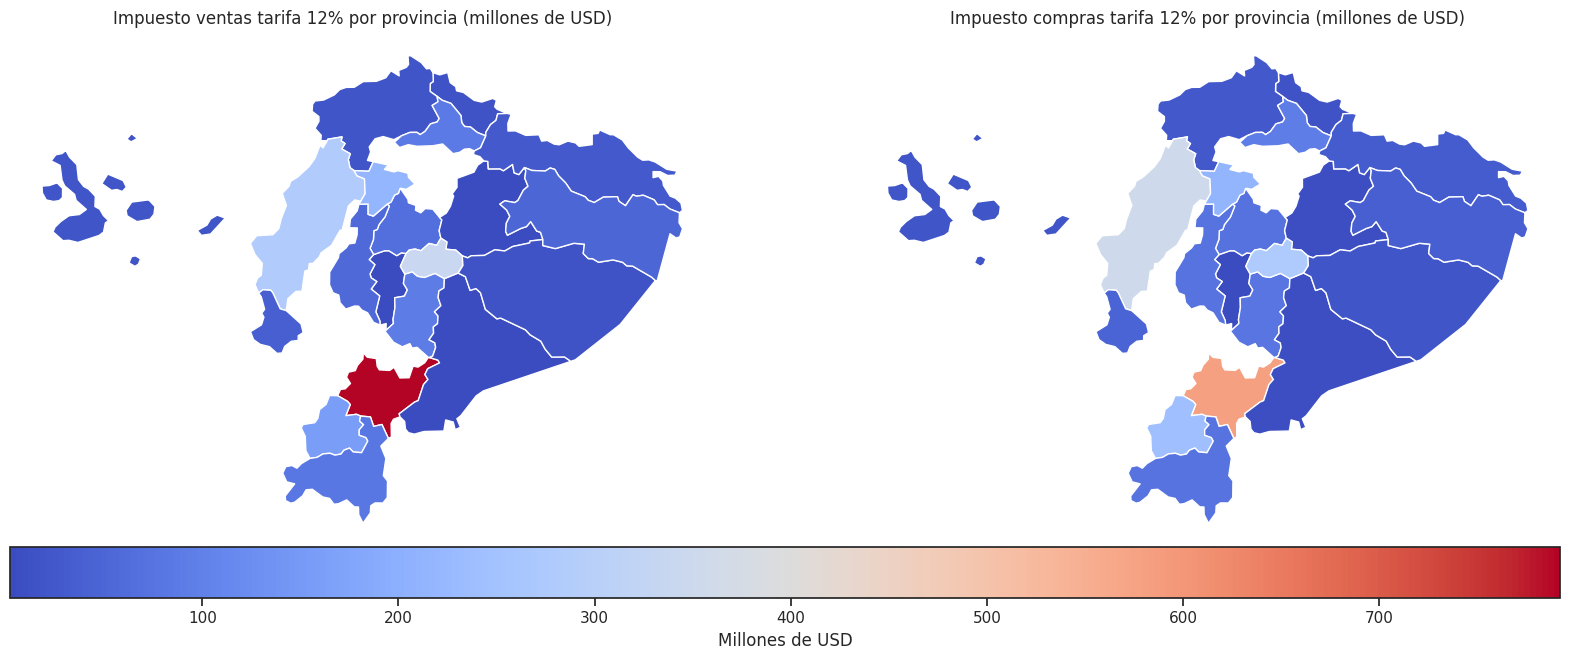

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
impuesto_ventas_12_mill.plot(
    ax=ax[0], column="IMPUESTO_VENTAS_12_MILLONES", legend=False, cmap=cmap, norm=norm_2
)
impuesto_compras_12_mill.plot(
    ax=ax[1], column="IMPUESTO_COMPRAS_12_MILLONES", legend=False, cmap=cmap, norm=norm_2
)
fig.colorbar(
    sm,
    ax=ax,
    orientation="horizontal",
    pad=0,
    aspect=30,
    label="Millones de USD",
)
ax[0].set_title("Impuesto ventas tarifa 12% por provincia (millones de USD)")
ax[0].axis('off')
ax[1].set_title("Impuesto compras tarifa 12% por provincia (millones de USD)")
ax[1].axis('off')
plt.show()

In [ ]:
cat_ventas = df_ec.groupby(['categoria']).agg({'TOTAL_VENTAS': 'sum'}).reset_index()
cat_compras = df_ec.groupby(['categoria']).agg({'TOTAL_COMPRAS': 'sum'}).reset_index()
cat_ventas['TOTAL_VENTAS_MILLONES'] = (cat_ventas['TOTAL_VENTAS'] / 1000000).round(0)
cat_compras['TOTAL_COMPRAS_MILLONES'] = (cat_compras['TOTAL_COMPRAS'] / 1000000).round(0)

In [ ]:
for i in cat_ventas['categoria'].unique():
    print(i)

ACT. DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.
ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL.
ACT. DE LOS HOGARES COMO EMPLEADORES; ACT. NO DIFERENCIADAS DE LOS HOGARES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO.
ACT. DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.
ACT. DE SERVICIOS ADMINISTRATIVOS Y DE APOYO.
ACT. FINANCIERAS Y DE SEGUROS.
ACT. INMOBILIARIAS.
ACT. PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.
ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA.
AGRICULTURA, GANADERÍA,  SILVICULTURA Y PESCA.
ARTES, ENTRETENIMIENTO Y RECREACIÓN.
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS.
CONSTRUCCIÓN.
DISTRIBUCIÓN DE AGUA; ALCANTARILLADO, GESTIÓN DE DESECHOS Y ACT. DE SANEAMIENTO.
ENSEÑANZA.
EXPLOTACIÓN DE MINAS Y CANTERAS.
INDUSTRIAS MANUFACTURERAS.
INFORMACIÓN Y COMUNICACIÓN.
OTRAS ACT. DE SERVICIOS.
SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO.
TRANSPORTE Y ALMACENAMIENTO

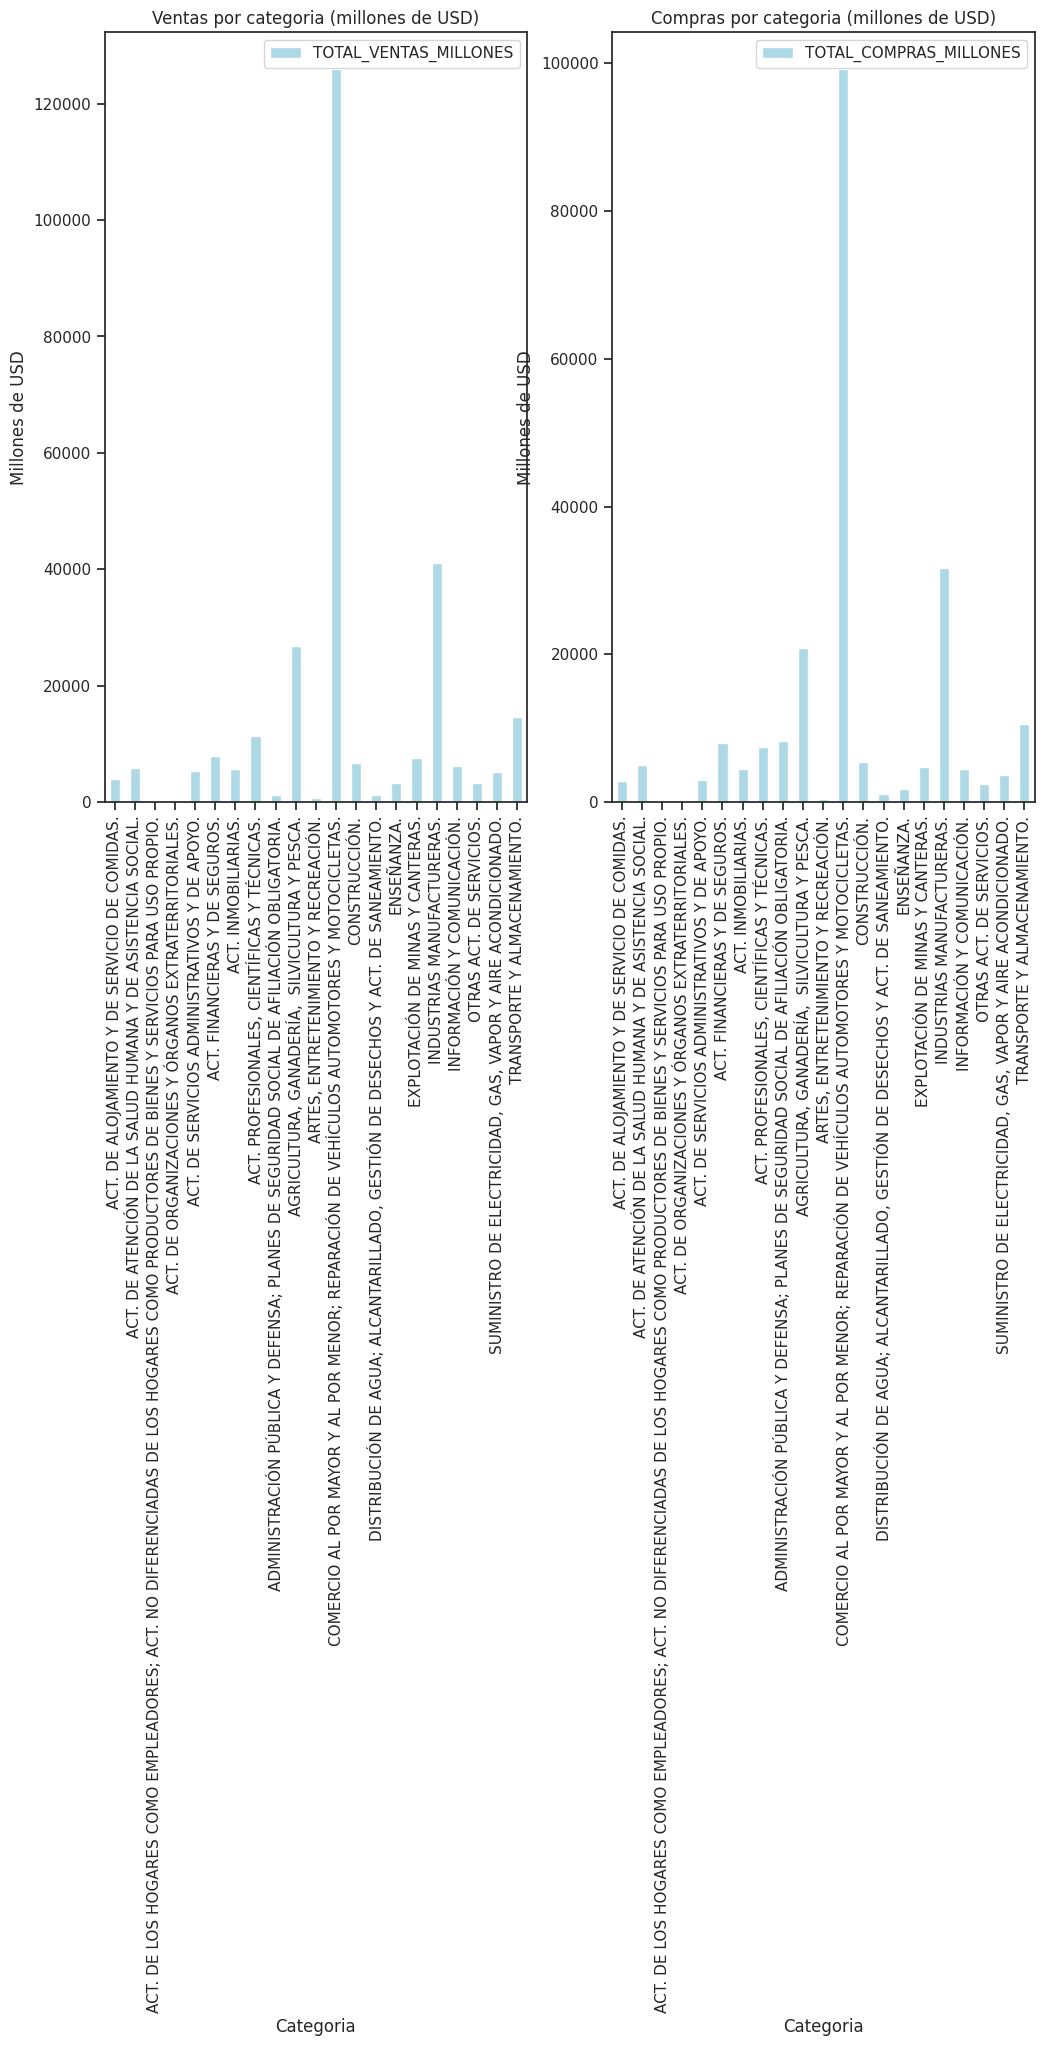

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
cat_ventas.plot(
    ax=ax[0], kind='bar', x='categoria', y='TOTAL_VENTAS_MILLONES', color='lightblue'
)
cat_compras.plot(
    ax=ax[1], kind='bar', x='categoria', y='TOTAL_COMPRAS_MILLONES', color='lightblue'
)
ax[0].set_title("Ventas por categoria (millones de USD)")
ax[0].set_ylabel("Millones de USD")
ax[0].set_xlabel("Categoria")
ax[1].set_title("Compras por categoria (millones de USD)")
ax[1].set_ylabel("Millones de USD")
ax[1].set_xlabel("Categoria")
plt.show()

In [ ]:
df_ec.to_csv(source_path + 'df_ec.csv')